<h1 align='center'>Body Performance</h1>

<h5 align="right">@aiskido</h5>

<b>Importing the packages<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import explained_variance_score, r2_score

<h3>Reading the data</h3>

In [2]:
data = pd.read_csv('bodyPerformance.csv')
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


<h3>Data Preparation</h3>

In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

At our dataset we don't have any nan values

<AxesSubplot:>

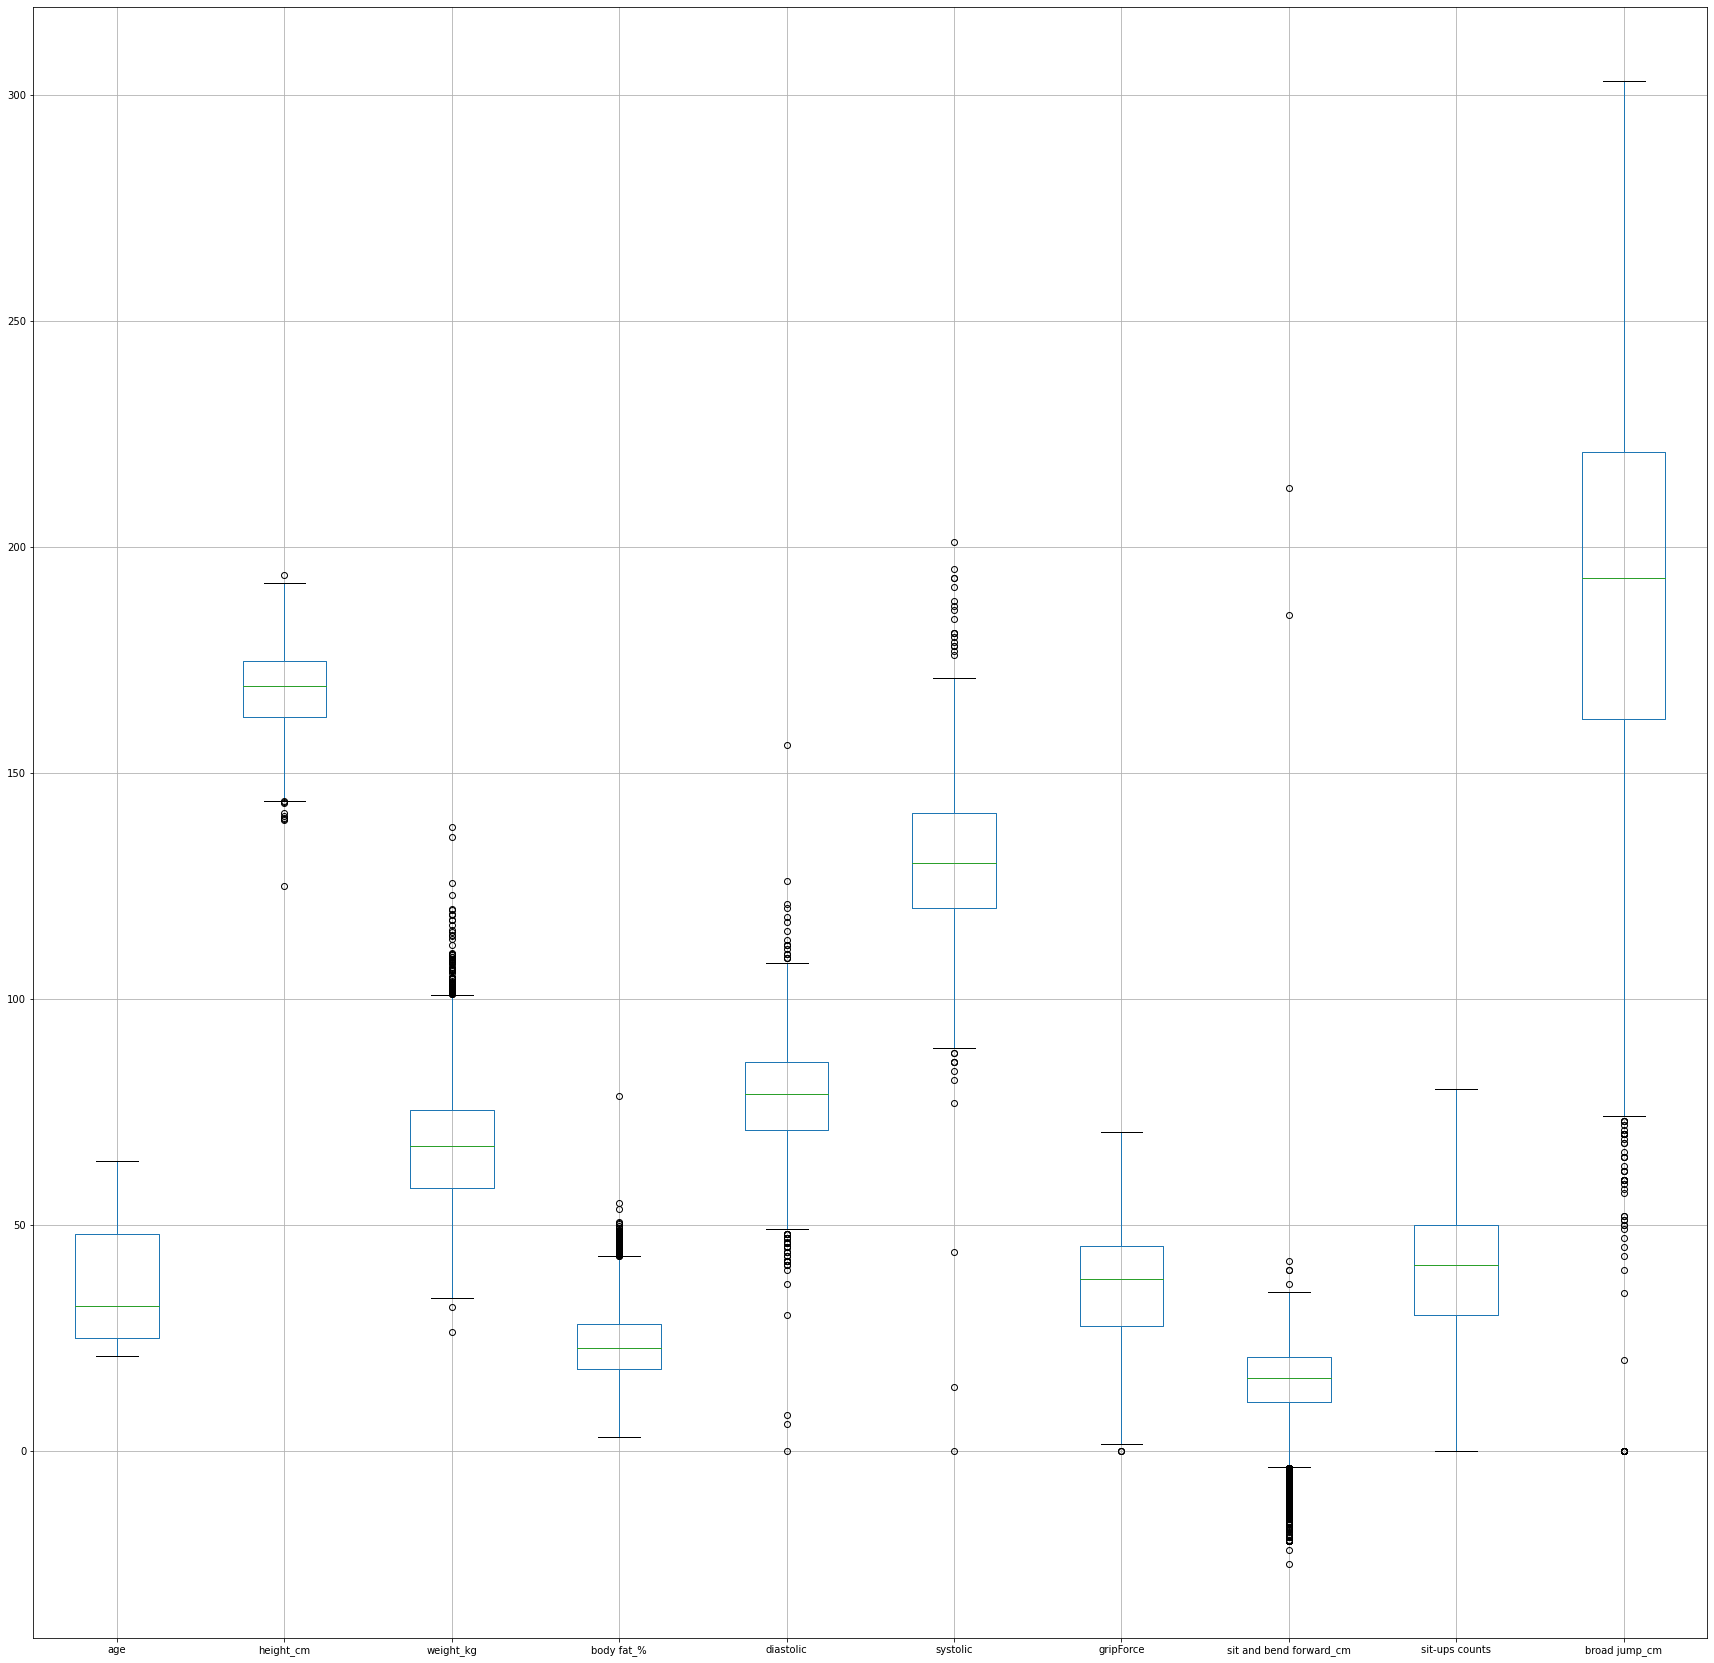

In [7]:
fig = plt.figure(figsize=(30,30))
data.boxplot()

<AxesSubplot:ylabel='Frequency'>

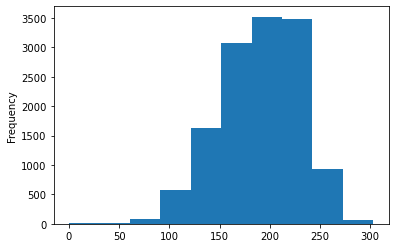

In [76]:
data['broad jump_cm'].plot(kind='hist')

In [77]:
data['sit and bend forward_cm'].describe()

count    13391.000000
mean        15.181818
std          8.151725
min        -25.000000
25%         10.900000
50%         16.200000
75%         20.700000
max         42.000000
Name: sit and bend forward_cm, dtype: float64

In [78]:
data['sit and bend forward_cm'].unique()

array([ 18.4 ,  16.3 ,  12.  ,  15.2 ,  27.1 ,  21.  ,   0.8 ,  12.3 ,
        18.6 ,  12.1 ,  16.  ,  30.  ,  13.1 ,  19.2 ,   7.2 ,  19.  ,
        22.9 ,  17.8 ,  15.1 ,  20.5 ,  10.7 ,  29.1 ,  19.7 ,  11.6 ,
        27.5 ,   4.  ,   8.1 ,   3.7 ,  24.4 ,  26.4 ,   9.1 ,  23.  ,
        -2.  ,  21.3 ,   6.3 ,  16.2 ,   1.8 ,   1.  ,   9.  ,  18.2 ,
        22.2 ,  26.6 ,  14.5 ,  14.2 ,  -9.9 ,  18.8 ,  18.3 ,  24.7 ,
        18.1 ,  14.7 ,  20.2 ,   2.1 ,  17.4 ,   3.6 ,   7.1 ,  20.9 ,
        13.5 ,  25.5 ,   6.7 ,  13.4 ,  20.7 ,  16.6 ,   3.4 ,   9.5 ,
        16.8 ,  13.9 ,   9.8 ,  -9.3 ,  12.4 ,  12.7 ,  23.1 ,  22.4 ,
        29.4 ,  11.3 ,  20.  ,  28.6 ,  17.1 ,  24.3 ,  20.6 ,  18.7 ,
        11.1 ,  17.9 ,  10.8 ,   7.  ,  29.8 ,   8.6 ,   1.9 ,  17.2 ,
         5.4 ,  23.5 ,  15.6 ,  22.5 ,   5.3 ,  15.3 ,  21.1 ,  31.3 ,
        22.8 ,  16.5 ,  21.7 ,  16.7 ,   4.3 ,  23.7 ,  21.4 ,  13.7 ,
        11.7 ,  12.5 ,  16.1 ,  10.  ,   6.1 ,  21.6 ,  28.  ,   3.  ,
      

In [10]:
data.drop(data[data['sit and bend forward_cm']>50].index, inplace=True)

In [11]:
data = data.reset_index(drop=True)
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13386,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13387,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13388,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13389,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


<b>Changing gender column to is_male</b>

In [12]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [13]:
data['is_male'] = data['gender'].replace({'M': 1, 'F': 0})
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,is_male
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,1
13387,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,1
13388,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13389,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [14]:
data.drop('gender', axis=1, inplace = True)

In [15]:
data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,is_male
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13386,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,1
13387,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,1
13388,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13389,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


<h3>KNN part</h3>

<b>Classification</b>

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train and test

In [17]:
data.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class', 'is_male'],
      dtype='object')

In [18]:
x = data[['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'is_male']]
y = data[['class']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [20]:
x_train

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,is_male
3854,22.0,175.5,73.7,35.5,73.0,132.0,27.5,11.3,30.0,160.0,0
4223,23.0,179.1,68.4,18.9,98.0,139.0,42.9,7.1,46.0,217.0,1
712,58.0,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,1
8964,22.0,160.1,48.5,20.0,81.0,138.0,25.4,25.0,58.0,190.0,0
12210,58.0,175.9,78.5,18.6,74.0,131.0,53.5,13.2,49.0,202.0,1
...,...,...,...,...,...,...,...,...,...,...,...
905,34.0,180.7,84.9,22.8,90.0,155.0,33.9,15.3,57.0,255.0,1
5192,37.0,170.0,74.0,23.1,78.0,133.0,41.5,14.9,48.0,190.0,1
12172,31.0,173.2,71.7,19.9,84.0,137.0,44.1,13.7,33.0,230.0,1
235,21.0,169.2,64.9,35.3,68.0,125.0,29.9,22.3,39.0,174.0,0


model

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred = knn.predict(x_test)

In [24]:
accuracy_score(y_test, y_pred)

0.5323544051767048

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.52      0.75      0.61       982
           B       0.37      0.38      0.37      1032
           C       0.49      0.39      0.44       993
           D       0.86      0.61      0.71      1011

    accuracy                           0.53      4018
   macro avg       0.56      0.53      0.53      4018
weighted avg       0.56      0.53      0.53      4018



In [26]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [27]:
knn.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [28]:
y_pred = knn.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.58      0.68      0.63       982
           B       0.38      0.40      0.39      1032
           C       0.45      0.45      0.45       993
           D       0.79      0.64      0.71      1011

    accuracy                           0.54      4018
   macro avg       0.55      0.54      0.54      4018
weighted avg       0.55      0.54      0.54      4018



In [30]:
for k in [5,7,9,11]:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f'{k} NEIGHBORS')
    print(classification_report(y_test, y_pred))

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5 NEIGHBORS
              precision    recall  f1-score   support

           A       0.59      0.71      0.65       982
           B       0.41      0.42      0.42      1032
           C       0.50      0.50      0.50       993
           D       0.84      0.63      0.72      1011

    accuracy                           0.57      4018
   macro avg       0.58      0.57      0.57      4018
weighted avg       0.58      0.57      0.57      4018



C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 NEIGHBORS
              precision    recall  f1-score   support

           A       0.60      0.74      0.66       982
           B       0.43      0.43      0.43      1032
           C       0.51      0.52      0.51       993
           D       0.85      0.64      0.73      1011

    accuracy                           0.58      4018
   macro avg       0.60      0.58      0.58      4018
weighted avg       0.59      0.58      0.58      4018



C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9 NEIGHBORS
              precision    recall  f1-score   support

           A       0.60      0.75      0.67       982
           B       0.44      0.43      0.44      1032
           C       0.51      0.53      0.52       993
           D       0.86      0.64      0.73      1011

    accuracy                           0.59      4018
   macro avg       0.60      0.59      0.59      4018
weighted avg       0.60      0.59      0.59      4018



C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


11 NEIGHBORS
              precision    recall  f1-score   support

           A       0.60      0.75      0.67       982
           B       0.44      0.44      0.44      1032
           C       0.52      0.53      0.52       993
           D       0.86      0.64      0.74      1011

    accuracy                           0.59      4018
   macro avg       0.60      0.59      0.59      4018
weighted avg       0.60      0.59      0.59      4018



<b>Regression</b>

In [31]:
from sklearn.neighbors import KNeighborsRegressor

train and test

In [32]:
data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,is_male
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13386,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,1
13387,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,1
13388,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13389,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [33]:
data.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,is_male
age,1.000000,-0.293974,-0.099970,0.242289,0.158458,0.211136,-0.179589,-0.073097,-0.544603,-0.435229,-0.060252
height_cm,-0.293974,1.000000,0.734906,-0.515473,0.146013,0.210218,0.735044,-0.228890,0.500483,0.674727,0.730989
weight_kg,-0.099970,0.734906,1.000000,-0.084099,0.262386,0.338963,0.700140,-0.305893,0.294960,0.479691,0.672974
body fat_%,0.242289,-0.515473,-0.084099,1.000000,0.048059,-0.030399,-0.541794,-0.072765,-0.608898,-0.673284,-0.551409
diastolic,0.158458,0.146013,0.262386,0.048059,1.000000,0.676300,0.202063,-0.077671,0.016499,0.097142,0.228481
systolic,0.211136,0.210218,0.338963,-0.030399,0.676300,1.000000,0.286014,-0.086372,0.056277,0.152885,0.323911
gripForce,-0.179589,0.735044,0.700140,-0.541794,0.202063,0.286014,1.000000,-0.117301,0.576677,0.746900,0.800203
sit and bend forward_cm,-0.073097,-0.228890,-0.305893,-0.072765,-0.077671,-0.086372,-0.117301,1.000000,0.181661,0.023751,-0.342327
sit-ups counts,-0.544603,0.500483,0.294960,-0.608898,0.016499,0.056277,0.576677,0.181661,1.000000,0.748258,0.474564
broad jump_cm,-0.435229,0.674727,0.479691,-0.673284,0.097142,0.152885,0.746900,0.023751,0.748258,1.000000,0.704121


In [34]:
x_reg = pd.get_dummies(data, columns=['class'])

In [35]:
y_reg = data[['broad jump_cm']]

In [36]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size = 0.3, random_state=1)

In [37]:
x_train_reg

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,is_male,class_A,class_B,class_C,class_D
3854,22.0,175.5,73.7,35.5,73.0,132.0,27.5,11.3,30.0,160.0,0,0,0,1,0
4223,23.0,179.1,68.4,18.9,98.0,139.0,42.9,7.1,46.0,217.0,1,0,0,1,0
712,58.0,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,1,0,0,0,1
8964,22.0,160.1,48.5,20.0,81.0,138.0,25.4,25.0,58.0,190.0,0,1,0,0,0
12210,58.0,175.9,78.5,18.6,74.0,131.0,53.5,13.2,49.0,202.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,34.0,180.7,84.9,22.8,90.0,155.0,33.9,15.3,57.0,255.0,1,0,0,0,1
5192,37.0,170.0,74.0,23.1,78.0,133.0,41.5,14.9,48.0,190.0,1,0,1,0,0
12172,31.0,173.2,71.7,19.9,84.0,137.0,44.1,13.7,33.0,230.0,1,0,0,0,1
235,21.0,169.2,64.9,35.3,68.0,125.0,29.9,22.3,39.0,174.0,0,0,1,0,0


model

In [38]:
neigh = KNeighborsRegressor(n_neighbors=3)

In [39]:
neigh.fit(x_train_reg, y_train_reg)

KNeighborsRegressor(n_neighbors=3)

In [40]:
y_pred_reg = neigh.predict(x_test_reg)

In [41]:
print(r2_score(y_test_reg, y_pred_reg))

0.994368265115783


In [42]:
for k in [5,7,9,11]:
    neigh = KNeighborsRegressor(n_neighbors=k, weights='distance')
    neigh.fit(x_train_reg, y_train_reg)
    y_pred_reg = neigh.predict(x_test_reg)
    print(f'\n{k} NEIGHBORS')
    print(r2_score(y_test_reg, y_pred_reg))


5 NEIGHBORS
0.9956854886830324

7 NEIGHBORS
0.9960141214325108

9 NEIGHBORS
0.9960578085630535

11 NEIGHBORS
0.9959418109105852


<h3>SVM part</h3>

<b>Classification</b>

In [43]:
from sklearn import svm
from sklearn.svm import SVR

In [44]:
clf = svm.SVC()

In [45]:
clf.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [46]:
print(clf.score(x_train, y_train))

0.6167715779366265


In [47]:
y_pred = clf.predict(x_test)
y_pred

array(['C', 'D', 'D', ..., 'B', 'D', 'C'], dtype=object)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.64      0.73      0.68       982
           B       0.45      0.42      0.44      1032
           C       0.53      0.55      0.54       993
           D       0.81      0.73      0.77      1011

    accuracy                           0.61      4018
   macro avg       0.61      0.61      0.61      4018
weighted avg       0.61      0.61      0.61      4018



In [49]:
clf = svm.SVC(kernel='linear')

In [50]:
clf.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [51]:
y_pred = clf.predict(x_test)
y_pred

array(['C', 'D', 'D', ..., 'B', 'D', 'C'], dtype=object)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.67      0.75      0.70       982
           B       0.47      0.46      0.46      1032
           C       0.53      0.50      0.51       993
           D       0.79      0.75      0.77      1011

    accuracy                           0.61      4018
   macro avg       0.61      0.61      0.61      4018
weighted avg       0.61      0.61      0.61      4018



<b>Regression</b>

In [53]:
regr = svm.SVR()

In [54]:
regr.fit(x_train_reg, y_train_reg)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [55]:
y_pred_reg = regr.predict(x_test_reg)
y_pred_reg

array([211.50745924, 199.33195657, 205.05020456, ..., 135.29414387,
       184.5989515 , 154.03804934])

In [56]:
print(r2_score(y_test_reg, y_pred_reg))

0.9937926037213415


In [57]:
regr = svm.SVR(kernel='linear')
regr.fit(x_train_reg, y_train_reg)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [58]:
y_pred_reg = regr.predict(x_test_reg)
print(r2_score(y_test_reg, y_pred_reg))

0.9999995624991381


<h3>Decision Tree</h3>

In [59]:
from sklearn import tree
from sklearn import metrics

<b>Classification</b>

In [60]:
clf = tree.DecisionTreeClassifier()

In [61]:
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier()

In [62]:
y_pred = clf.predict(x_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.68      0.69      0.69       982
           B       0.51      0.50      0.51      1032
           C       0.57      0.57      0.57       993
           D       0.78      0.78      0.78      1011

    accuracy                           0.64      4018
   macro avg       0.64      0.64      0.64      4018
weighted avg       0.63      0.64      0.63      4018



[Text(339.56840962477713, 1603.62, 'X[7] <= 9.25\ngini = 0.75\nsamples = 9373\nvalue = [2365, 2314, 2356, 2338]'),
 Text(38.09036584335823, 1549.26, 'X[7] <= 4.55\ngini = 0.433\nsamples = 1888\nvalue = [0, 37, 535, 1316]'),
 Text(7.756265308831159, 1494.8999999999999, 'X[0] <= 59.5\ngini = 0.069\nsamples = 918\nvalue = [0, 0, 33, 885]'),
 Text(4.309036282683977, 1440.54, 'X[5] <= 158.5\ngini = 0.01\nsamples = 818\nvalue = [0, 0, 4, 814]'),
 Text(1.723614513073591, 1386.1799999999998, 'X[0] <= 56.5\ngini = 0.005\nsamples = 808\nvalue = [0, 0, 2, 806]'),
 Text(0.8618072565367955, 1331.82, 'gini = 0.0\nsamples = 778\nvalue = [0, 0, 0, 778]'),
 Text(2.5854217696103863, 1331.82, 'X[8] <= 33.0\ngini = 0.124\nsamples = 30\nvalue = [0, 0, 2, 28]'),
 Text(1.723614513073591, 1277.46, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27]'),
 Text(3.447229026147182, 1277.46, 'X[9] <= 178.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1]'),
 Text(2.5854217696103863, 1223.1, 'gini = 0.0\nsamples = 2\nva

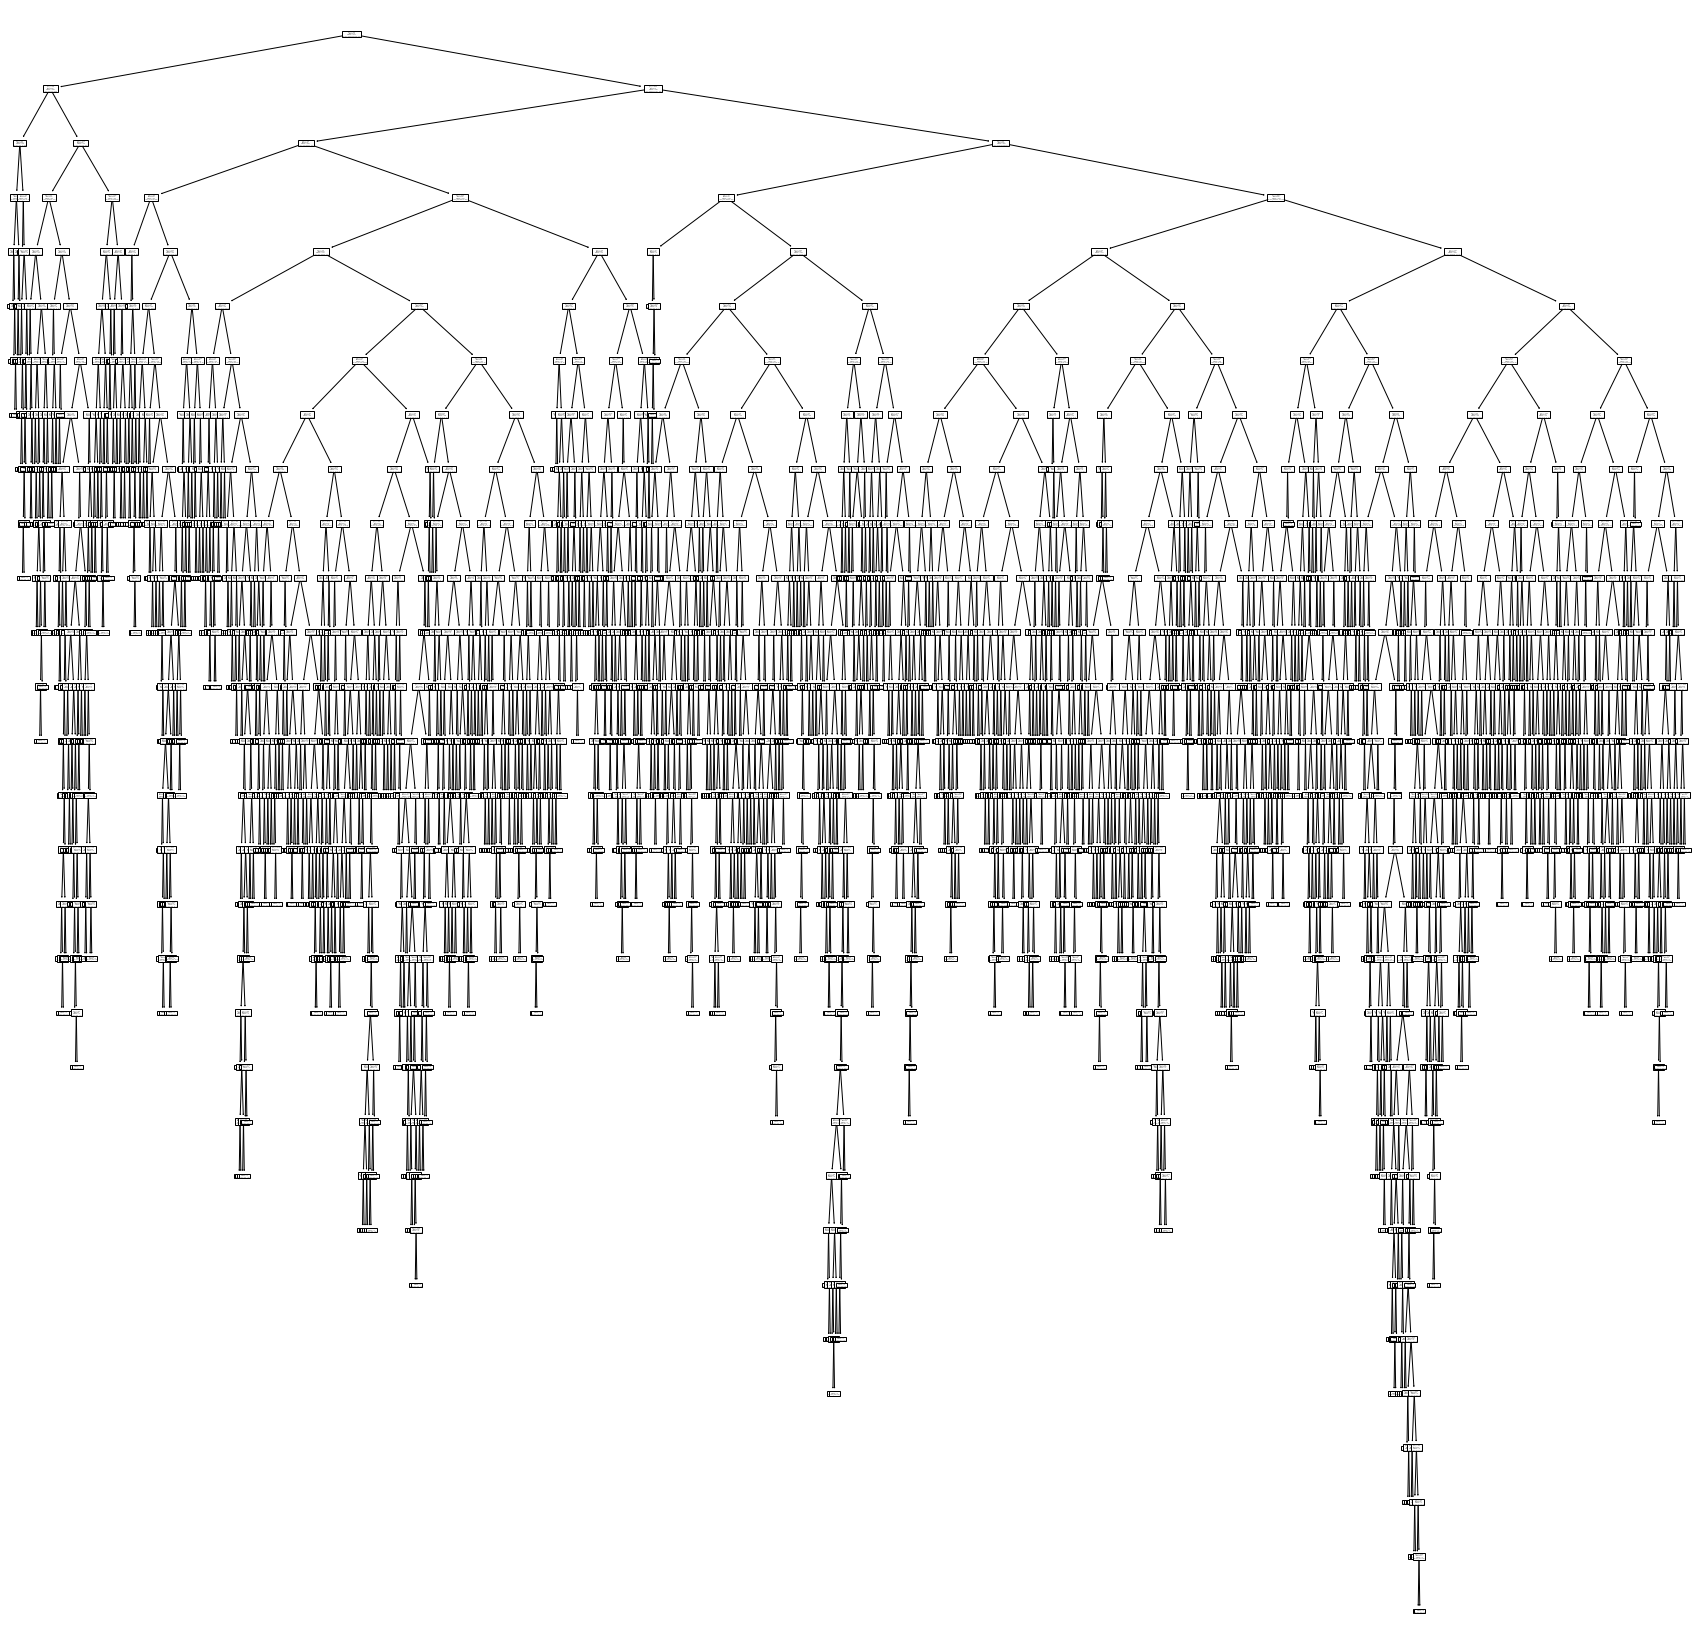

In [64]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf)

In [65]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(criterion='entropy')

In [66]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.69      0.69      0.69       982
           B       0.52      0.51      0.52      1032
           C       0.57      0.60      0.58       993
           D       0.80      0.78      0.79      1011

    accuracy                           0.64      4018
   macro avg       0.65      0.64      0.65      4018
weighted avg       0.65      0.64      0.64      4018



[Text(353.2590603812406, 1595.3478260869565, 'X[7] <= 11.75\nentropy = 2.0\nsamples = 9373\nvalue = [2365, 2314, 2356, 2338]'),
 Text(63.9888087321764, 1524.4434782608696, 'X[7] <= 4.55\nentropy = 1.332\nsamples = 2645\nvalue = [0, 282, 852, 1511]'),
 Text(3.6820431355776866, 1453.5391304347827, 'X[0] <= 55.5\nentropy = 0.223\nsamples = 918\nvalue = [0, 0, 33, 885]'),
 Text(2.863811327671534, 1382.6347826086956, 'entropy = 0.0\nsamples = 769\nvalue = [0, 0, 0, 769]'),
 Text(4.50027494348384, 1382.6347826086956, 'X[7] <= 2.25\nentropy = 0.763\nsamples = 149\nvalue = [0, 0, 33, 116]'),
 Text(3.6820431355776866, 1311.7304347826087, 'entropy = 0.0\nsamples = 85\nvalue = [0, 0, 0, 85]'),
 Text(5.318506751389991, 1311.7304347826087, 'X[3] <= 25.5\nentropy = 0.999\nsamples = 64\nvalue = [0, 0, 33, 31]'),
 Text(3.2729272316246103, 1240.8260869565217, 'X[0] <= 60.5\nentropy = 0.579\nsamples = 29\nvalue = [0, 0, 25, 4]'),
 Text(2.4546954237184577, 1169.9217391304348, 'X[8] <= 32.0\nentropy = 0.9

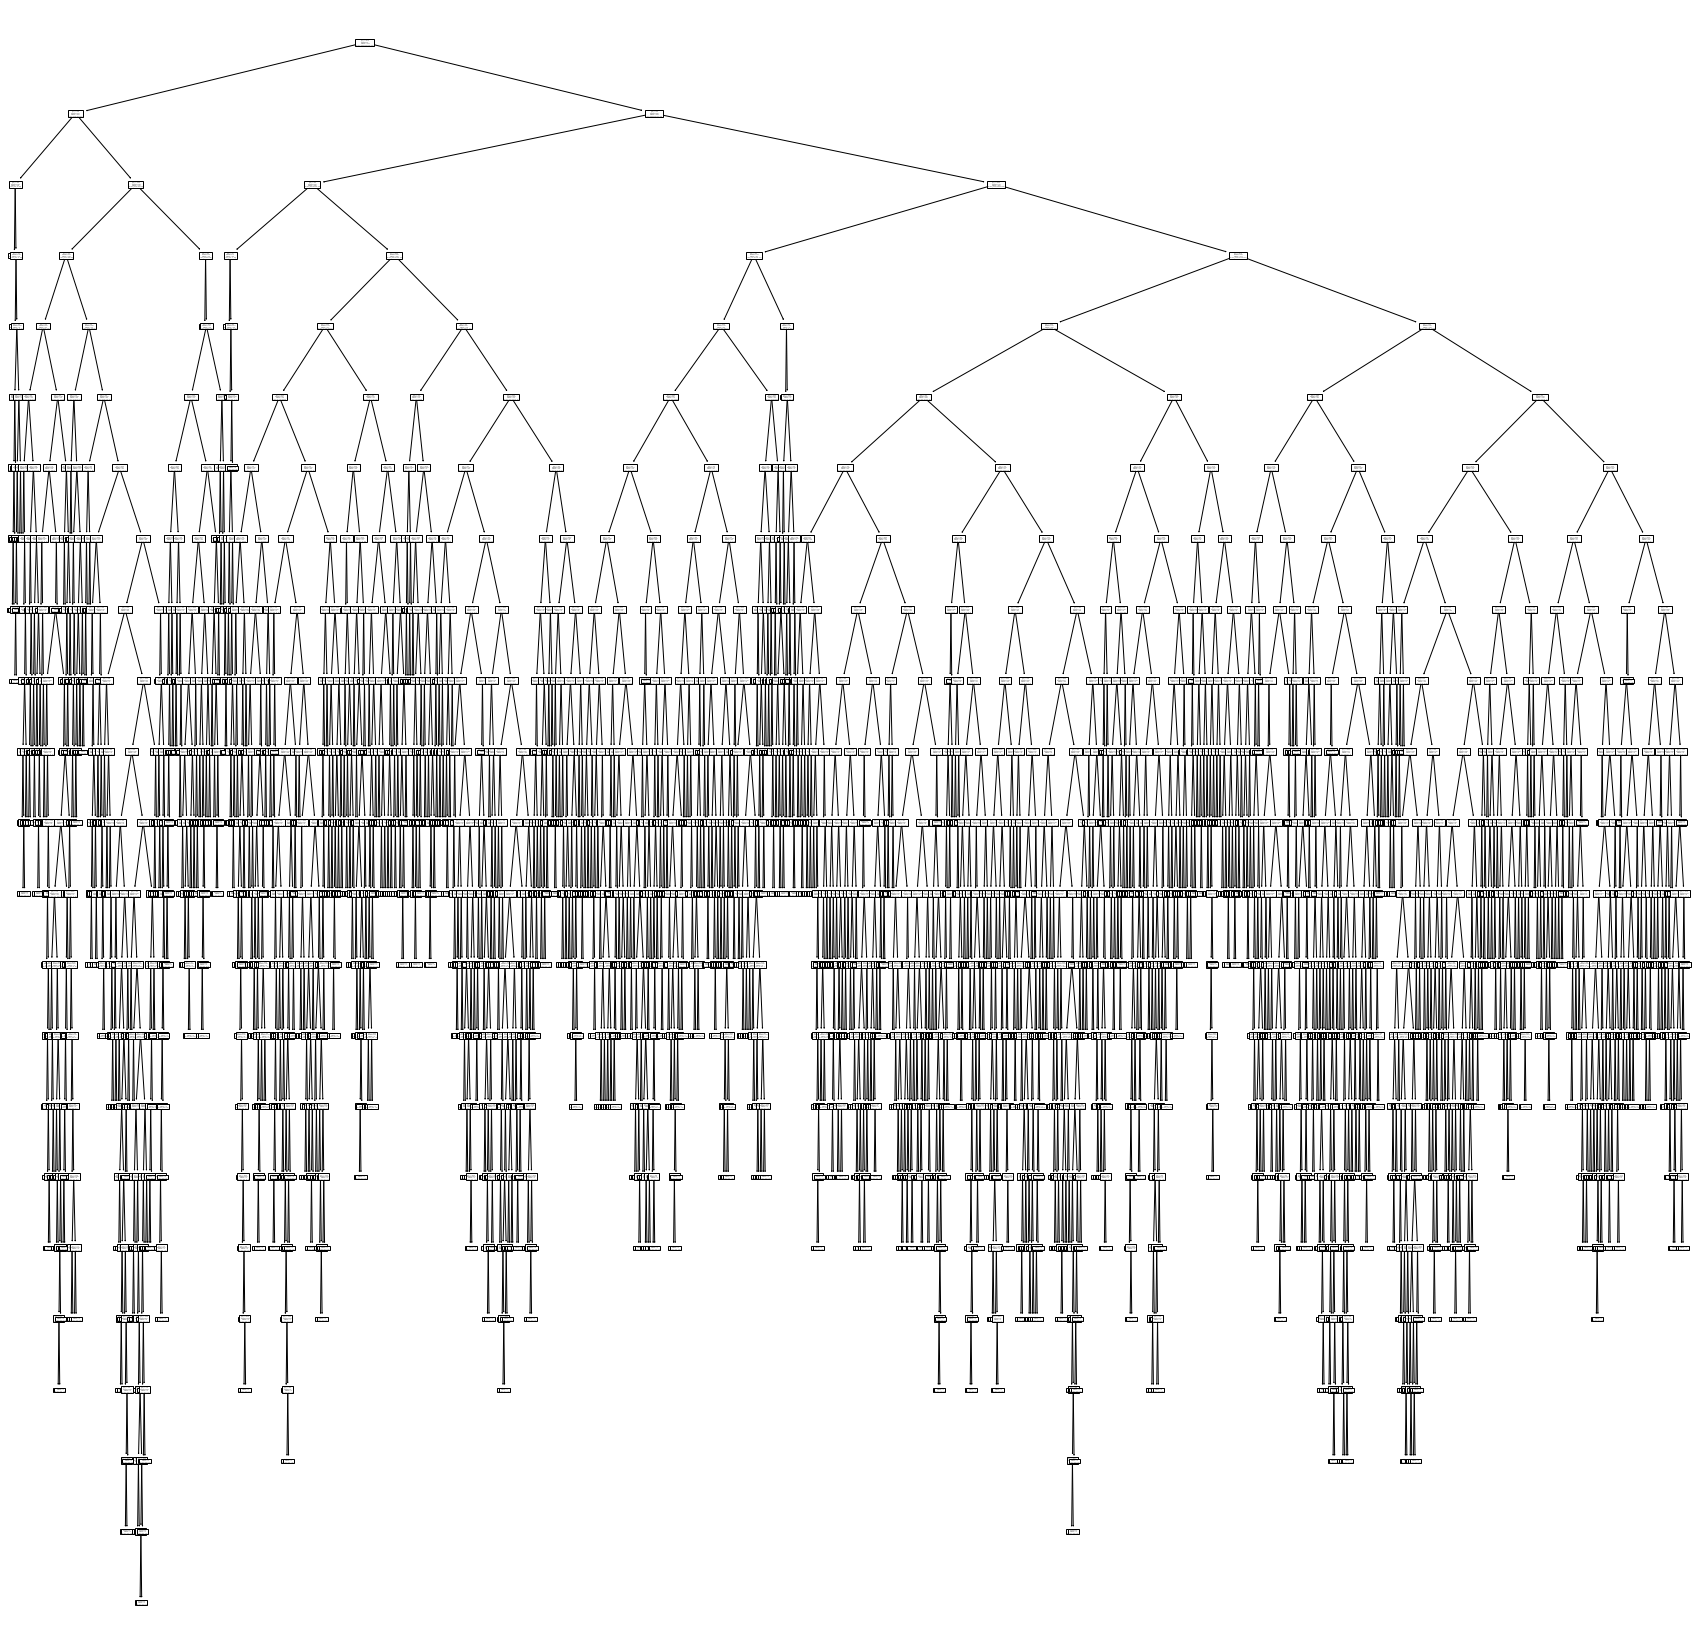

In [67]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf)

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)
clf = clf.fit(x_train, y_train)

In [69]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.68      0.83      0.75       982
           B       0.55      0.52      0.53      1032
           C       0.63      0.57      0.60       993
           D       0.85      0.78      0.81      1011

    accuracy                           0.67      4018
   macro avg       0.67      0.67      0.67      4018
weighted avg       0.67      0.67      0.67      4018



[Text(440.3992764261745, 1562.85, 'X[7] <= 11.75\nentropy = 2.0\nsamples = 9373\nvalue = [2365, 2314, 2356, 2338]'),
 Text(92.28667305848514, 1426.9499999999998, 'X[7] <= 4.55\nentropy = 1.332\nsamples = 2645\nvalue = [0, 282, 852, 1511]'),
 Text(7.222435282837967, 1291.05, 'X[0] <= 55.5\nentropy = 0.223\nsamples = 918\nvalue = [0, 0, 33, 885]'),
 Text(5.617449664429531, 1155.1499999999999, 'entropy = 0.0\nsamples = 769\nvalue = [0, 0, 0, 769]'),
 Text(8.827420901246406, 1155.1499999999999, 'X[7] <= 2.25\nentropy = 0.763\nsamples = 149\nvalue = [0, 0, 33, 116]'),
 Text(7.222435282837967, 1019.2499999999999, 'entropy = 0.0\nsamples = 85\nvalue = [0, 0, 0, 85]'),
 Text(10.432406519654842, 1019.2499999999999, 'X[3] <= 25.5\nentropy = 0.999\nsamples = 64\nvalue = [0, 0, 33, 31]'),
 Text(6.419942473633749, 883.3499999999999, 'X[0] <= 60.5\nentropy = 0.579\nsamples = 29\nvalue = [0, 0, 25, 4]'),
 Text(4.8149568552253115, 747.4499999999999, 'X[8] <= 32.0\nentropy = 0.971\nsamples = 10\nvalue 

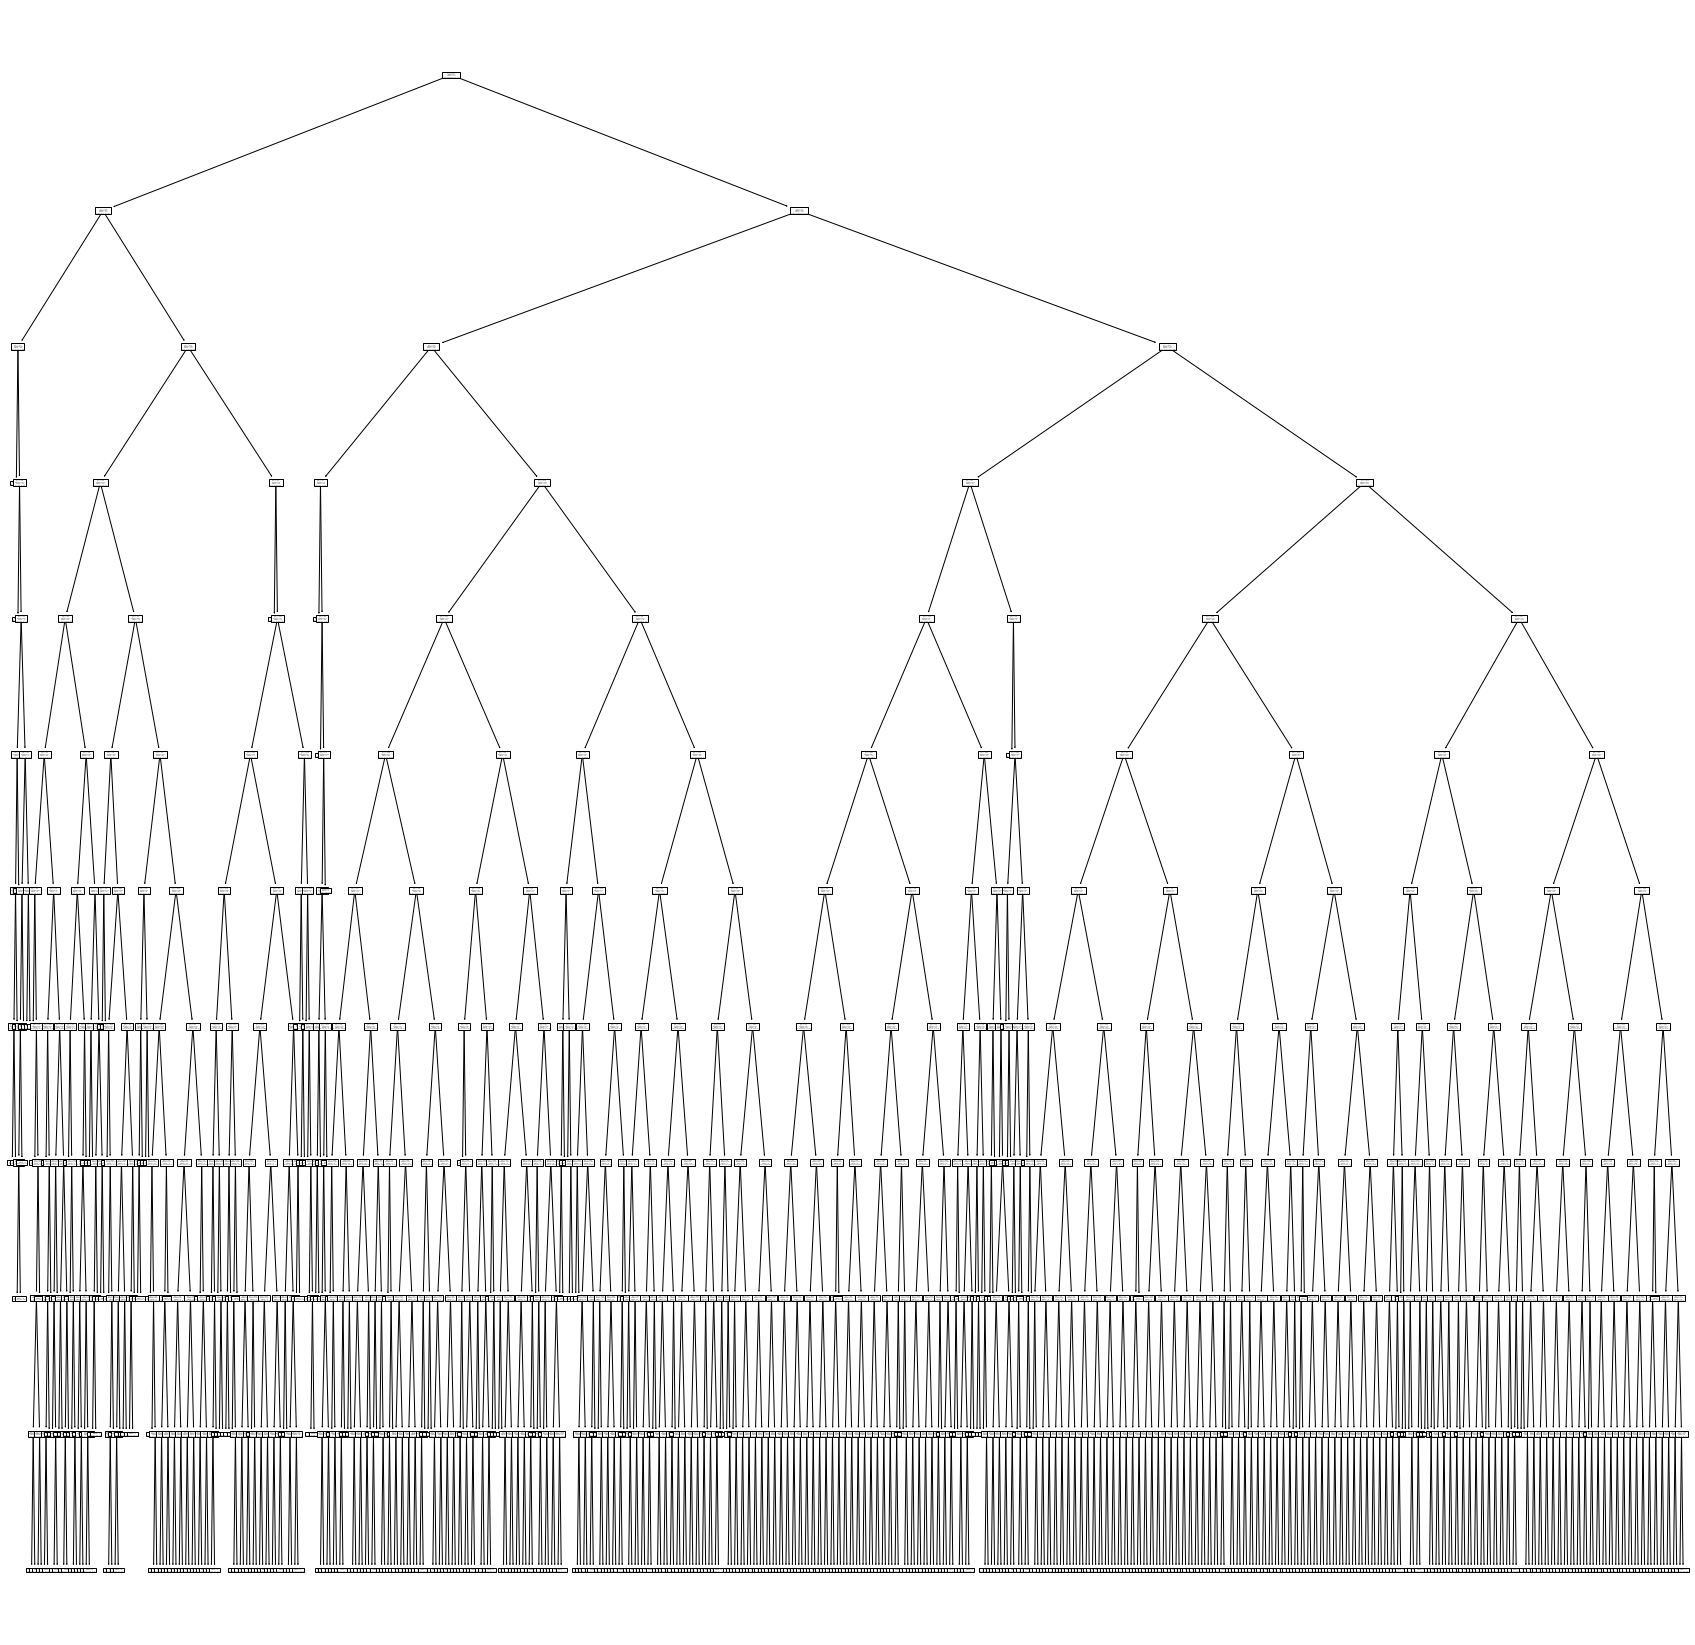

In [70]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf)

<h4>Regression</h4>

In [71]:
regTree = tree.DecisionTreeRegressor()

In [72]:
regTree = regTree.fit(x_train_reg, y_train_reg)

In [73]:
y_pred_reg = regTree.predict(x_test_reg)

In [74]:
print(r2_score(y_test_reg, y_pred_reg))

0.9998587704341814


[Text(895.2614519817073, 1556.6727272727271, 'X[9] <= 187.5\nmse = 1557.439\nsamples = 9373\nvalue = 190.597'),
 Text(580.7325457317073, 1408.418181818182, 'X[9] <= 146.5\nmse = 634.125\nsamples = 4217\nvalue = 154.601'),
 Text(358.14923780487806, 1260.1636363636362, 'X[9] <= 113.5\nmse = 386.454\nsamples = 1332\nvalue = 124.398'),
 Text(181.94542682926829, 1111.909090909091, 'X[9] <= 79.0\nmse = 432.785\nsamples = 280\nvalue = 94.979'),
 Text(70.43048780487806, 963.6545454545454, 'X[9] <= 17.5\nmse = 606.596\nsamples = 43\nvalue = 55.907'),
 Text(66.34756097560975, 815.4, 'mse = 0.0\nsamples = 6\nvalue = 0.0'),
 Text(74.51341463414634, 815.4, 'X[9] <= 61.0\nmse = 115.918\nsamples = 37\nvalue = 64.973'),
 Text(32.66341463414634, 667.1454545454545, 'X[9] <= 54.0\nmse = 53.521\nsamples = 12\nvalue = 51.75'),
 Text(16.33170731707317, 518.890909090909, 'X[6] <= 18.4\nmse = 29.918\nsamples = 7\nvalue = 46.714'),
 Text(8.165853658536586, 370.63636363636374, 'X[8] <= 2.0\nmse = 16.0\nsamples 

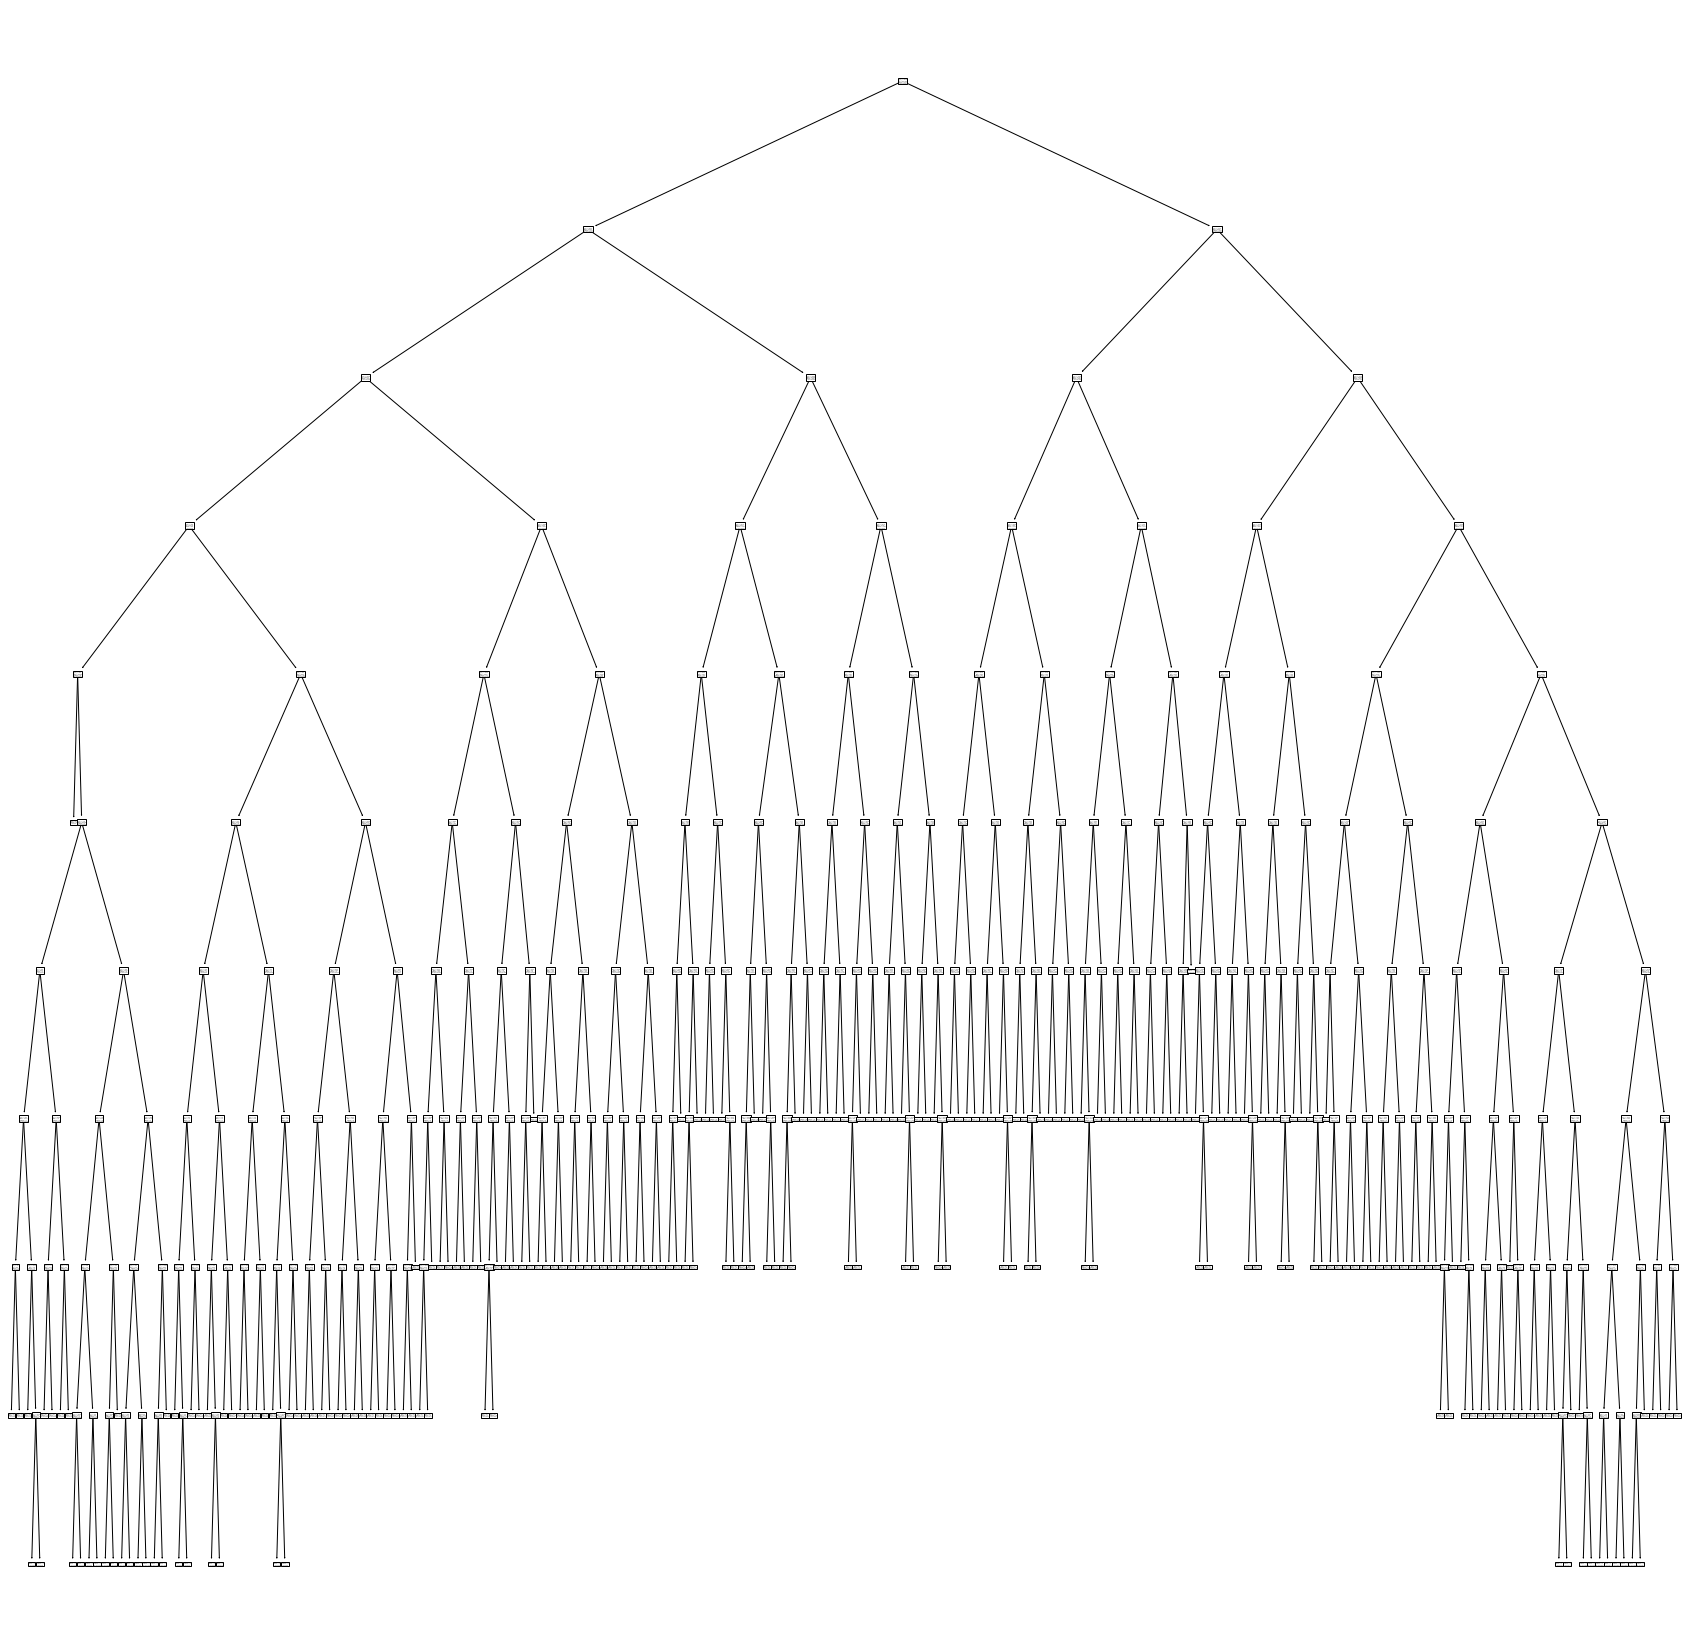

In [75]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(regTree)

<h3>Logistic Regression</h3>

In [79]:
from sklearn.linear_model import LogisticRegression

In [94]:
LReg = LogisticRegression()

In [95]:
LReg = LReg.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
y_pred = LReg.predict(x_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.65      0.71      0.68       982
           B       0.46      0.39      0.42      1032
           C       0.50      0.52      0.51       993
           D       0.76      0.76      0.76      1011

    accuracy                           0.59      4018
   macro avg       0.59      0.60      0.59      4018
weighted avg       0.59      0.59      0.59      4018



In [98]:
LReg_1 = LogisticRegression(C=3.5, solver='newton-cg')
LReg_1 = LReg_1.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [99]:
y_pred_1 = LReg_1.predict(x_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           A       0.68      0.72      0.70       982
           B       0.45      0.41      0.43      1032
           C       0.50      0.51      0.51       993
           D       0.77      0.78      0.77      1011

    accuracy                           0.60      4018
   macro avg       0.60      0.61      0.60      4018
weighted avg       0.60      0.60      0.60      4018



<h3>Grid Search</h3>

In [87]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {'penalty':('l1', 'l2', 'none'), 
              'C':[1, 3, 5, 7],
             'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

In [91]:
LReg = LogisticRegression()
clf = GridSearchCV(LReg, parameters)
clf.fit(x_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklea

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklea

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklea

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linea

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignor

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aa

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Use

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklea

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklear

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignor

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aa

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the lin

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklea

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklear

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignor

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7], 'penalty': ('l1', 'l2', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [92]:
y_pred = clf.predict(x_test)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.68      0.72      0.70       982
           B       0.45      0.41      0.43      1032
           C       0.50      0.51      0.51       993
           D       0.77      0.78      0.77      1011

    accuracy                           0.60      4018
   macro avg       0.60      0.60      0.60      4018
weighted avg       0.60      0.60      0.60      4018

